### Coincidence system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.ndimage as ndimage
import re
import matplotlib.dates as md
import datetime as dt

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [2]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [3]:
def pixel_map (data):
    
    nBars = 30
    N = len(data)
    hits = []
    matrix = np.zeros((nBars,nBars))
    sum_columns = np.zeros(nBars)
    sum_rows = np.zeros(nBars)

    sum_cl1 = 0
    sum_cl2 = 0
    sum_cl3 = 0

    sum_rw1 = 0
    sum_rw2 = 0
    sum_rw3 = 0

    Eventos = 0

    for k in range (N):

        columns = np.concatenate((data[k,0:27], data[k,29:32]), axis=0)
        rows = np.concatenate((data[k,32:35], data[k,37:64]), axis=0)

        if (np.sum(columns) == 1):    # Condición de activación de una barra por capa horizontal
            if (np.sum(rows) == 1):   # Condición de activación de una barra por capa vertical

                Eventos += 1
                hits.append(data[k,:])

                for i in range(nBars):   # Rows
                    for j in range(nBars):  # Columns

                        matrix[i,j]= matrix[i,j] + rows[i]*columns[j]

        #if (np.sum(columns) == 1):    # Condición de activación de una barra por capa horizontal
        #    if (np.sum(rows) == 1):   # Condición de activación de una barra por capa vertical

         #       Eventos += 1

    matrix = np.fliplr(matrix)  # Matrix reordering

    print 'Numero de eventos = ' + str(Eventos)
    print 'SNR = ' + str(100*Eventos/float(N))
    
    # 2D histogram plot
    
    fig = plt.figure(figsize=(35, 8))
    ax = fig.add_subplot(131)
    ax.set_xlabel('Columns', fontsize = 25)
    ax.set_ylabel('Rows', fontsize = 25)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.invert_yaxis()
    im = plt.imshow(matrix, interpolation='nearest', origin='low')

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # Color bar
    clb = plt.colorbar()
    clb.set_label('Hits', fontsize = 25)

    # Increase tick labels
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    # 1D histogram
    
    # Channels histogram

    hist = np.sum(hits, axis=0)
    chs = np.linspace(0, 63, num=64)
    
    
    fig = plt.figure(figsize=(15, 5))
    plt.bar(chs, hist, alpha=0.5)
    plt.axvline(x=32, color='r', lw=2)
    #plt.text(15, 1100, "x bars", fontsize=20)
    #plt.text(45, 1100, "y bars", fontsize=20)
    plt.xlabel('Channel', fontsize = 25)
    plt.ylabel('Counts', fontsize = 25)
    plt.grid()
    

    return matrix

Line to filter the segmentation fault errors

for i in {00..23};do sed -i '/$$/d' ./MuTe_P2_2019_01_30h$i.dat; echo $i;done

In [21]:
data = np.loadtxt('Field_Data/Hodoscope/12_2019/clean/MuTe_P1_2019_12_25h12.dat','string', comments='#')
N = len(data)
print ('Pulsos = ' + str(N))

Pulsos = 10829


In [17]:
# Extract the events from the data

n_Chann = 64
events = np.zeros((N,n_Chann))

for i in range(N):

    x=(" ".join(data[i][4]))
    lin=map(int ,x.split(' '))
    if len(lin) == n_Chann:  # Lines with legth greater than 64
        events[i,:]=lin
    else:
        print ("Line : ") + str(i)

In [18]:
hist = np.sum(events, axis=0)
chs = np.linspace(0, 63, num=64)

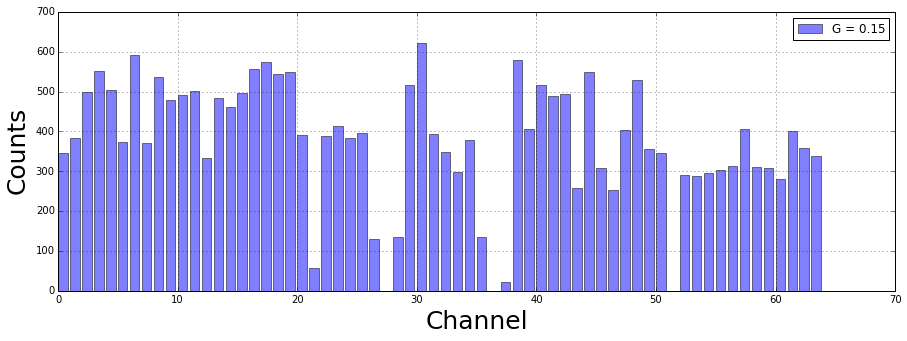

In [19]:
fig = plt.figure(figsize=(15, 5))
plt.bar(chs, hist, alpha=0.5)
plt.xlabel('Channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.legend(["G = 0.15", "Calibrated"])
plt.grid()

Numero de eventos = 1858
SNR = 11.8328875303


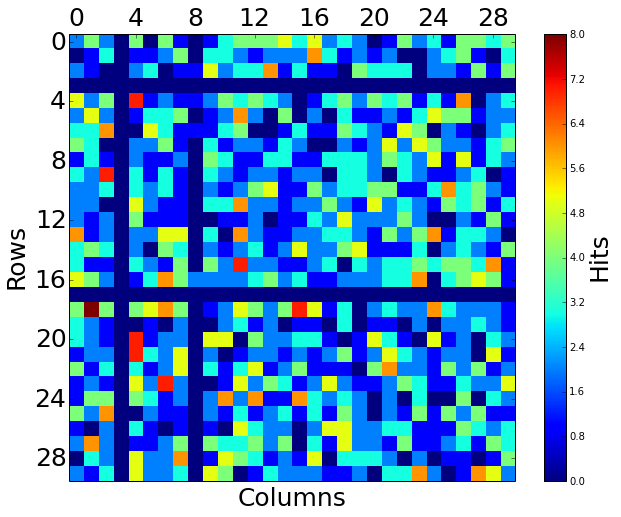

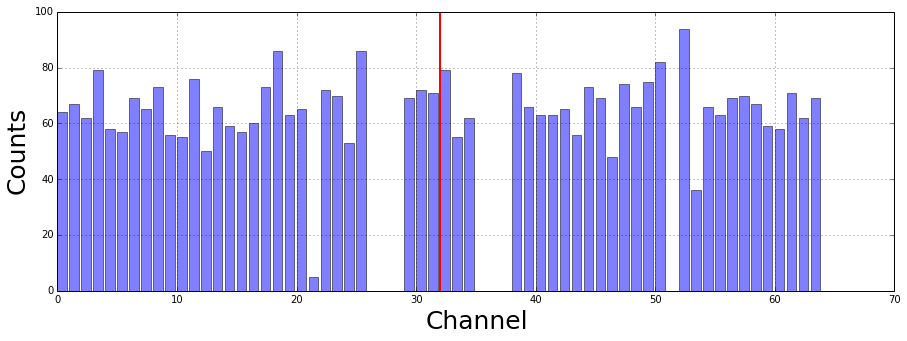

In [20]:
mat = pixel_map(events)

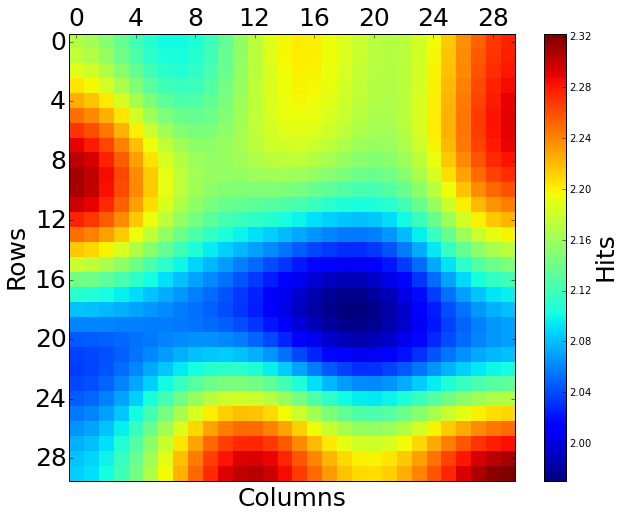

In [15]:
img = ndimage.gaussian_filter(mat, sigma=(5), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img, interpolation='nearest')
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
ax.invert_yaxis()
ax.xaxis.tick_top()

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

plt.show()

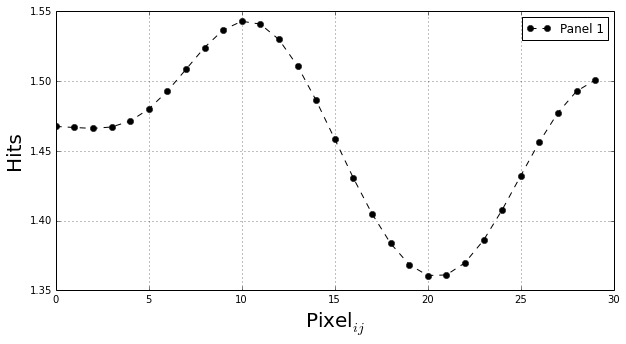

Atenuation percentage = 11.81 


In [10]:
diag = np.diagonal(img)

fig = plt.figure(figsize=(10, 5))
plt.plot(diag, '--ok')
plt.xlabel("Pixel$_{ij}$", fontsize = 20)
plt.ylabel("Hits", fontsize = 20)
plt.legend(["Panel 1", "Panle 2"], loc=1)
plt.grid()
plt.show()

print ("Atenuation percentage = %.2f " % ((np.max(diag) - np.min(diag))*100/np.max(diag)))

### Panel 2

In [11]:
data = np.loadtxt('Field_Data/Hodoscope/12_2019/clean/MuTe_P2_2019_12_25h13.dat','string', comments='#')
N = len(data)
print ('Pulsos = ' + str(N))

Pulsos = 11047


In [12]:
# Extract the events from the data

events = np.zeros((N,64))

for i in range(N):

    x=(" ".join(data[i][4]))
    lin=map(int ,x.split(' '))
    if len(lin) == 64:
        events[i,:]=lin

In [13]:
hist = np.sum(events, axis=0)
chs = np.linspace(0, 63, num=64)

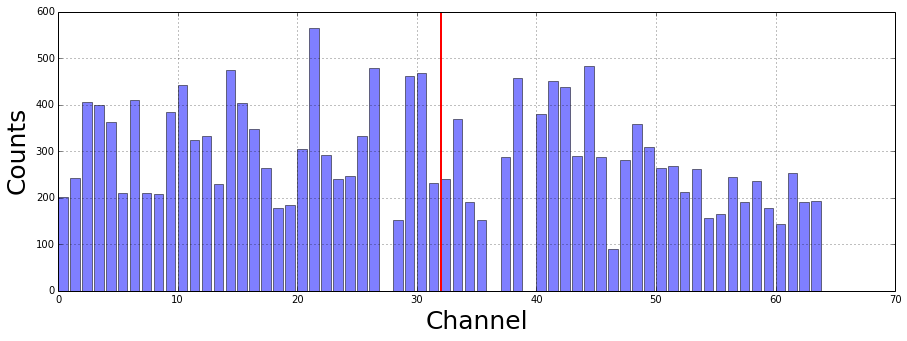

In [14]:
fig = plt.figure(figsize=(15, 5))
plt.bar(chs, hist, alpha=0.5)
plt.axvline(x=32, color='r', lw=2)
plt.xlabel('Channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
#plt.legend(["G = 0.15", "Calibrated"])
plt.grid()

Numero de eventos = 1099
SNR = 9.94840228116


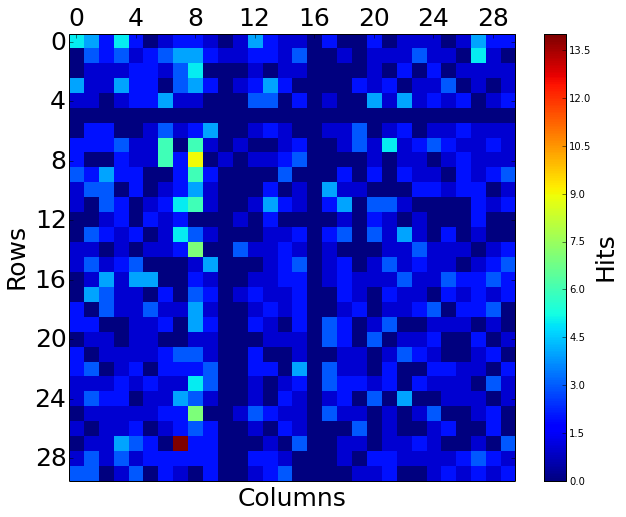

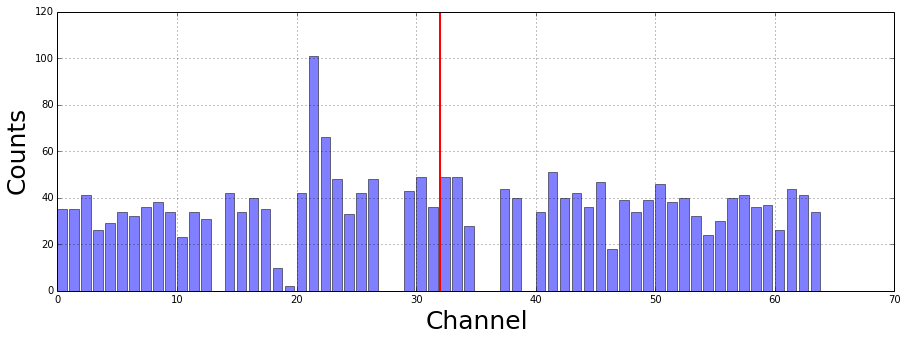

In [15]:
mat = pixel_map(events)

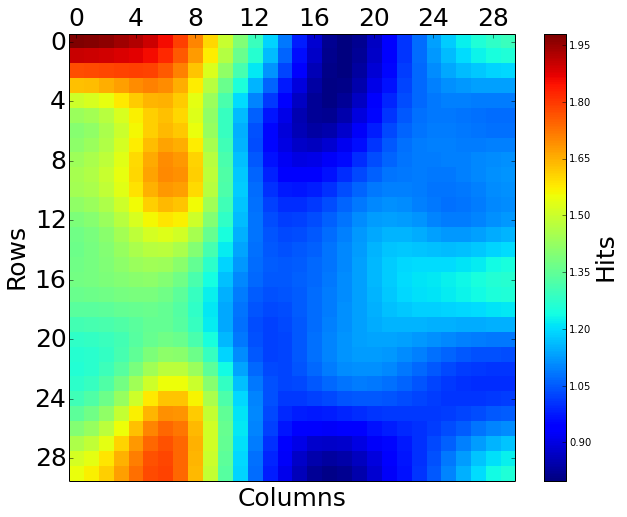

In [16]:
img = ndimage.gaussian_filter(mat, sigma=(3), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img, interpolation='nearest')
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
ax.invert_yaxis()
ax.xaxis.tick_top()

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

plt.show()

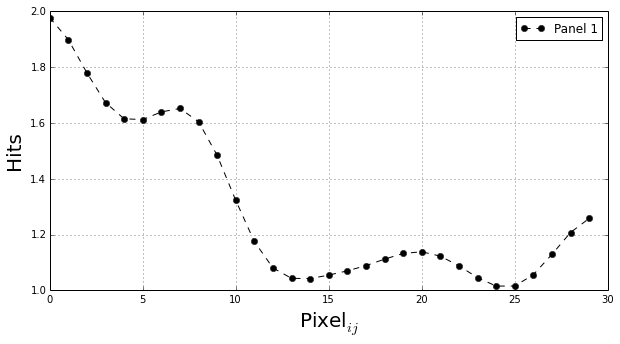

Atenuation percentage = 48.65 


In [17]:
diag = np.diagonal(img)

fig = plt.figure(figsize=(10, 5))
plt.plot(diag, '--ok')
plt.xlabel("Pixel$_{ij}$", fontsize = 20)
plt.ylabel("Hits", fontsize = 20)
plt.legend(["Panel 1", "Panle 2"], loc=1)
plt.grid()
plt.show()

print ("Atenuation percentage = %.2f " % ((np.max(diag) - np.min(diag))*100/np.max(diag)))

### Hodoscope coincidence

The first test was to measure the difference between the data recorded in both panels.

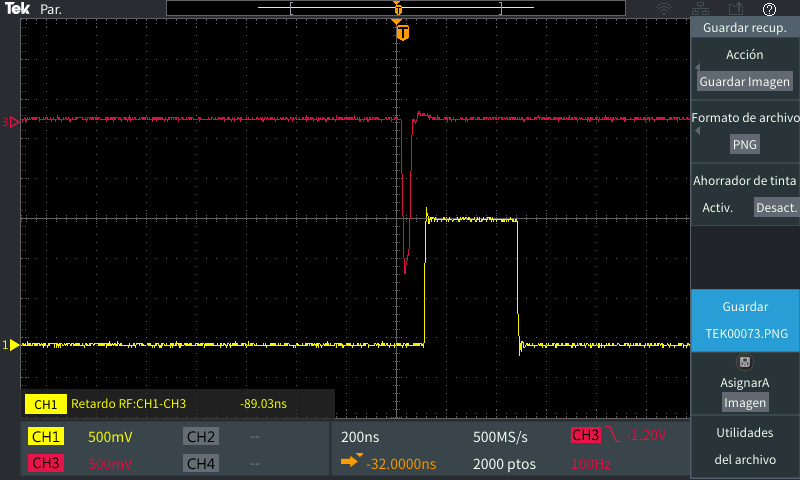

In [18]:
from IPython.display import Image
Image(filename='Figures/Emulador.PNG', width = 500)

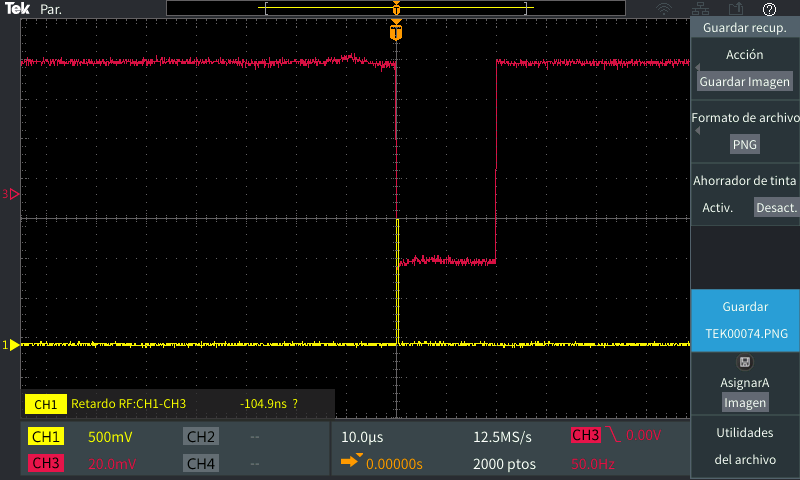

In [19]:
from IPython.display import Image
Image(filename='Figures/Generador.PNG', width = 500)

For the coincidence trigger we source the panels with the same signal in order to get a coincidence time and its standard deviation:

## One-hour analysis

### Image creation

In [20]:
file_Panel_1 = 'Field_Data/Hodoscope/12_2019/MuTe_P1_2019_12_20h01.dat'
file_Panel_2 = 'Field_Data/Hodoscope/12_2019/MuTe_P2_2019_12_20h01.dat'

count = 0
for line in open(file_Panel_1).xreadlines(  ): count += 1

print ("Number of lines P1: ") + str(count)

count = 0
for line in open(file_Panel_2).xreadlines(  ): count += 1

print ("Number of lines P2: ") + str(count)

Number of lines P1: 18421
Number of lines P2: 18291


### Init time

In [21]:
with open(file_Panel_1) as f:
    i = 0;
    for line in f:
        
        if line[0] == '#':
            if line[2] == 's':
                init_Time1 = int(line[4:15])
                L1 = i
                print "Time P1 : " + str(init_Time1) + " Line : " + str(L1)
                break
        i+= 1
                
with open(file_Panel_2) as f:
    i = 0
    for line in f:
        if line[0] == '#':
            if line[2] == 's':
                init_Time2 = int(line[4:15])
                L2 = i
                print "Time P2 : " + str(init_Time2) + " Line : " + str(L2)
                break
        i += 1

Time P1 : 1576803601 Line : 19
Time P2 : 1576803601 Line : 20


### Tree data creation

In [22]:
with open(file_Panel_1) as P1:
    
    p1_Dic={}
    array = []
    for line in P1:
        
        if line[0] != '#':
            array.append(line)
        
        
        if line[0] == '#':
            if line[2] == 's':
                address = line[4:14]
                p1_Dic[address] = array
                array = []


with open(file_Panel_2) as P2:
    
    p2_Dic={}
    array = []
    for line in P2:
        
        if line[0] != '#':
            array.append(line)
        
        if line[0] == '#':
            if line[2] == 's':
                address = line[4:14]
                p2_Dic[address] = array
                array = []



### Matching matrices creation

In [6]:
def match(file, address, p1_mat, p2_mat, window):
    
    fine_Res = 25
    coarse_Res = 400
    counter = 0

    len_P1 = len(p1_mat)
    len_P2 = len(p2_mat)

    file.write("# s " + address + "\n")
    
    if len_P1 <= len_P2:
        file.write("# r " + str(len_P1) + "\n")
    else:
        file.write("# r " + str(len_P2) + "\n")
    
    for i in range (len_P1):
        line_P1 = re.split(r'\t+', p1_mat[i])
        time_P1 = int(line_P1[3])
        fine_P1 = int(line_P1[1])*fine_Res
        coarse_P1 = int(line_P1[2])*coarse_Res
        ToF_P1 = fine_P1 + coarse_P1
        
        for j in range (len_P2):
            line_P2 = re.split(r'\t+', p2_mat[j])
            time_P2 = int(line_P2[3])
            fine_P2 = int(line_P2[1])*fine_Res
            coarse_P2 = int(line_P2[2])*coarse_Res
            ToF_P2 = fine_P2 + coarse_P2
            
            av_ToF = (ToF_P1 + ToF_P2)/2.0
            error = np.absolute(time_P1-time_P2)
             
            if  error < window:
                #print "Time P1 = " + str(time_P1) + "  Time P2 = " + str(time_P2) + "  error = " + str(error)
                
                file.write(str(counter) + "\t" + str(time_P1) + "   \t" +  str(error) + "\t" + str(av_ToF)  + "\t" + line_P1[4][:-1] + "\t" + line_P2[4][:-1] + "\n")
                counter += 1


### Coincidence file creation

In [24]:
nevents_P1 = len(p1_Dic)
nevents_P2 = len(p2_Dic)

file = open("Muography_12_2019.dat", 'w')

window = 400
match_counter = 0
timeoff = 1

for i in range(3600):
    i+=1
    address_P1 = str(init_Time1 + i)
    address_P2 = str(init_Time1 + i + timeoff )    # P2 time matching
    if p1_Dic.get(address_P1) != None:
            if p2_Dic.get(address_P2) != None:
                #print "Addresses: " + address_P1 + " " + address_P2
                p1_mat = p1_Dic[address_P1]
                p2_mat = p2_Dic[address_P2]
                match(file, address_P1, p1_mat, p2_mat, window)
                match_counter += 1

file.close() 

print "Seconds matched = " + str(match_counter)


Seconds matched = 3523


### Histogram generation 

In [25]:
nBars =  30         # Number of bars per axis
Nd = (2*nBars-1)    # Number of trajectories
C = nBars-2         # Shiffting index

matrix_P1 = np.zeros((nBars,nBars))
matrix_P2 = np.zeros((nBars,nBars))


matrix_ang = np.zeros((Nd,Nd))

sum_columns = np.zeros(nBars)
sum_rows = np.zeros(nBars)

sum_cl1 = 0
sum_cl2 = 0
sum_cl3 = 0

sum_rw1 = 0
sum_rw2 = 0
sum_rw3 = 0

evento = 0

with open('Muography_12_2019.dat') as Hits:
    
    for line in Hits:
        if line[0] != '#' and line[0] != '\t' and line[0] != '\n':
        
            split_line = re.split(r'\t+', line)
            P1 = split_line[4]
            P2 = split_line[5]
            
            try:
                # Panel 1 
            
                columns_P1 = map(int ,(" ".join(P1[0:27] + P1[29:32])).split(' '))
                rows_P1 = map(int ,(" ".join(P1[32:35] + P1[37:64])).split(' '))
    
                # Panel 2 
    
                columns_P2 = map(int ,(" ".join(P2[0:27] + P2[29:32])).split(' '))
                rows_P2 = map(int ,(" ".join(P2[32:35] + P2[37:64])).split(' '))
            
    
                suma_P1_col = np.sum(columns_P1) 
                suma_P1_row =  np.sum(rows_P1)
                suma_P2_col =  np.sum(columns_P2)
                suma_P2_row =  np.sum(rows_P2)
    
                evento = evento + 1
            
            except ValueError as e:
                print "Error at event " + split_line[1] + "\n"
        
            if (suma_P1_col == 1 and suma_P1_row == 1 and suma_P2_col == 1 and suma_P2_row == 1):   # Condición de activación de solo 4 barras
                for i in range(nBars):
                    for j in range(nBars):
            
                        matrix_P1[i,j]= rows_P1[i]*columns_P1[j]
                        matrix_P2[i,j]= rows_P2[i]*columns_P2[j]
        
                if (np.sum(matrix_P1) == 1 and np.sum(matrix_P2) == 1):
    
                    for i in range(nBars):
                        for j in range(nBars):
            
                            if matrix_P1[i,j]== 1:
                                iP1 = i
                                jP1 = j
                            if matrix_P2[i,j]== 1:
                                iP2 = i
                                jP2 = j

                    evento = evento + 1
                    
                    h = iP1 - iP2
                    b = jP1 - jP2
            
                    matrix_ang[h+C,b+C]= matrix_ang[h+C,b+C] + 1
                
            
print 'Número de eventos en ambos paneles = ' + str(evento) + '\n'
print matrix_ang

Número de eventos en ambos paneles = 21

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
sep = 250.0
base = 120.0
theta = int(np.rad2deg(np.arctan(base/sep)))/float(nBars)
theta*nBars

25.0

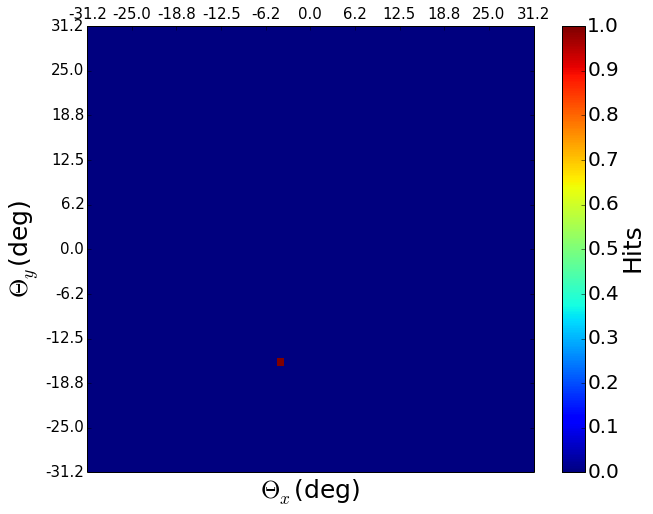

In [27]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(matrix_ang, interpolation='nearest', extent=extent, origin='lower')

ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
#ax.set_xticks(np.arange(Nt))
#ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)


#fig.savefig('Fondo.jpg')
#labelsx


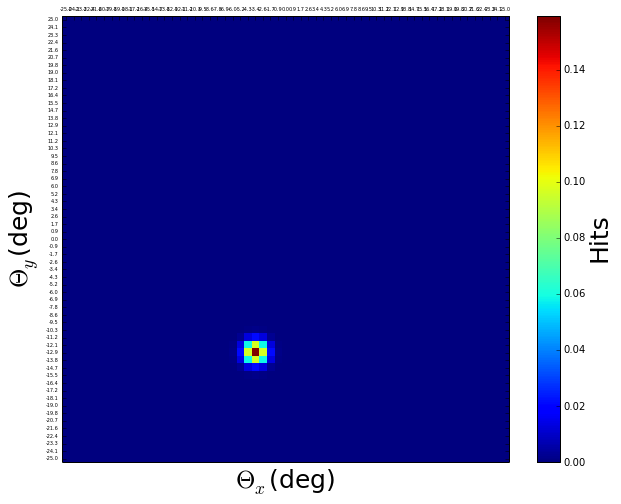

In [28]:
img_ang = ndimage.gaussian_filter(matrix_ang, sigma=(1), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img_ang, interpolation='nearest')
#plt.axvline(x=29, color='k', lw=1, linestyle='--')
#plt.axhline(y=29, color='k', lw=1, linestyle='--')
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
ax.xaxis.tick_top()

Nt = Nd
# Set tick labels
labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
ax.set_xticks(np.arange(Nt))
ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=5)

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

plt.show()

Solid angle calculation

    1. http://tpm.amc.anl.gov/NJZTools/XEDSSolidAngle.html

    2. https://www.earthobservatory.sg/project/muon-tomography-mayon-volcano-philippines-toward-better-understanding-open-vent-systems

    3. Gilbert -- https://link.springer.com/content/pdf/10.5047%2Feps.2009.07.003.pdf

## One_day analysis

### Data analysis

In [7]:
file = open("Field_Data/Hodoscope/12_2019/results/Field_12_25h.dat", 'w')

for i in range (24):
    
    hour = str(i).zfill(2)

    file_Panel_1 = 'Field_Data/Hodoscope/12_2019/MuTe_P1_2019_12_25h' + hour + '.dat'
    file_Panel_2 = 'Field_Data/Hodoscope/12_2019/MuTe_P2_2019_12_25h' + hour + '.dat'
    
    print "Analysing files: " + file_Panel_1 + " " + file_Panel_2

    count = 0
    for line in open(file_Panel_1).xreadlines(  ): count += 1

    #print ("Number of lines P1: ") + str(count)

    count = 0
    for line in open(file_Panel_2).xreadlines(  ): count += 1

    #print ("Number of lines P2: ") + str(count)
    
    # Init time determination
    
    
    with open(file_Panel_1) as f:
        i = 0;
        for line in f:
        
            if line[0] == '#':
                if line[2] == 's':
                    init_Time1 = int(line[4:15])
                    L1 = i
                    #print "Time P1 : " + str(init_Time1) + " Line : " + str(L1)
                    break
            i+= 1
                
    with open(file_Panel_2) as f:
        i = 0
        for line in f:
            if line[0] == '#':
                if line[2] == 's':
                    init_Time2 = int(line[4:15])
                    L2 = i
                    #print "Time P2 : " + str(init_Time2) + " Line : " + str(L2)
                    break
            i += 1

    # Tree data creation
    
    with open(file_Panel_1) as P1:
    
        p1_Dic={}
        array = []
        for line in P1:

            if line[0] != '#':
                array.append(line)


            if line[0] == '#':
                if line[2] == 's':
                    address = line[4:14]
                    p1_Dic[address] = array
                    array = []


    with open(file_Panel_2) as P2:

        p2_Dic={}
        array = []
        for line in P2:

            if line[0] != '#':
                array.append(line)

            if line[0] == '#':
                if line[2] == 's':
                    address = line[4:14]
                    p2_Dic[address] = array
                    array = []

    # Coincidence file creation
    
    nevents_P1 = len(p1_Dic)
    nevents_P2 = len(p2_Dic)

    file = open("Field_Data/Hodoscope/12_2019/results/Field_12_25h.dat", 'a')

    window = 800000 # 400
    match_counter = 0

    for i in range(3600):
        i+=1
        address_P1 = str(init_Time1 + i)
        address_P2 = str(init_Time1 + i + 1)    # P2 time matching
        if p1_Dic.get(address_P1) != None:
                if p2_Dic.get(address_P2) != None:
                    #print "Addresses: " + address_P1 + " " + address_P2
                    p1_mat = p1_Dic[address_P1]
                    p2_mat = p2_Dic[address_P2]
                    match(file, address_P1, p1_mat, p2_mat, window)
                    match_counter += 1

    file.close() 

    print "Seconds matched = " + str(match_counter) + "\n"


Analysing files: Field_Data/Hodoscope/12_2019/MuTe_P1_2019_12_25h00.dat Field_Data/Hodoscope/12_2019/MuTe_P2_2019_12_25h00.dat
Seconds matched = 3456

Analysing files: Field_Data/Hodoscope/12_2019/MuTe_P1_2019_12_25h01.dat Field_Data/Hodoscope/12_2019/MuTe_P2_2019_12_25h01.dat
Seconds matched = 3532

Analysing files: Field_Data/Hodoscope/12_2019/MuTe_P1_2019_12_25h02.dat Field_Data/Hodoscope/12_2019/MuTe_P2_2019_12_25h02.dat
Seconds matched = 3586

Analysing files: Field_Data/Hodoscope/12_2019/MuTe_P1_2019_12_25h03.dat Field_Data/Hodoscope/12_2019/MuTe_P2_2019_12_25h03.dat


IndexError: list index out of range

In [30]:
nBars =  30         # Number of bars per axis
Nd = (2*nBars-1)    # Number of trajectories
C = nBars-1         # Shiffting index

matrix_P1 = np.zeros((nBars,nBars))
matrix_P2 = np.zeros((nBars,nBars))


matrix_ang = np.zeros((Nd,Nd))

sum_columns = np.zeros(nBars)
sum_rows = np.zeros(nBars)

sum_cl1 = 0
sum_cl2 = 0
sum_cl3 = 0

sum_rw1 = 0
sum_rw2 = 0
sum_rw3 = 0

evento = 0

with open('Field_12_20h.dat') as Hits:
    
    for line in Hits:
        if line[0] != '#' and line[0] != '\t' and line[0] != '\n':
        
            split_line = re.split(r'\t+', line)
            P1 = split_line[4]
            P2 = split_line[5]
            
            try:
                # Panel 1 
            
                columns_P1 = map(int ,(" ".join(P1[0:27] + P1[29:32])).split(' '))
                rows_P1 = map(int ,(" ".join(P1[32:35] + P1[37:64])).split(' '))
    
                # Panel 2 
    
                columns_P2 = map(int ,(" ".join(P2[0:27] + P2[29:32])).split(' '))
                rows_P2 = map(int ,(" ".join(P2[32:35] + P2[37:64])).split(' '))
            
    
                suma_P1_col = np.sum(columns_P1) 
                suma_P1_row =  np.sum(rows_P1)
                suma_P2_col =  np.sum(columns_P2)
                suma_P2_row =  np.sum(rows_P2)
    
                evento = evento + 1
            
            except ValueError as e:
                print "Error at event " + split_line[1] + "\n"
        
            if (suma_P1_col == 1 and suma_P1_row == 1 and suma_P2_col == 1 and suma_P2_row == 1):   # Condición de activación de solo 4 barras
                for i in range(nBars):
                    for j in range(nBars):
            
                        matrix_P1[i,j]= rows_P1[i]*columns_P1[j]
                        matrix_P2[i,j]= rows_P2[i]*columns_P2[j]
        
                if (np.sum(matrix_P1) == 1 and np.sum(matrix_P2) == 1):
    
                    for i in range(nBars):
                        for j in range(nBars):
            
                            if matrix_P1[i,j]== 1:
                                iP1 = i
                                jP1 = j
                            if matrix_P2[i,j]== 1:
                                iP2 = i
                                jP2 = j

                    evento = evento + 1
                    
                    h = iP1 - iP2
                    b = jP1 - jP2
            
                    matrix_ang[h+C,b+C]= matrix_ang[h+C,b+C] + 1
                
            
print 'Número de eventos en ambos paneles = ' + str(evento) + '\n'
print matrix_ang

Número de eventos en ambos paneles = 108756

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
sep = 250.0
base = 120.0
theta = int(np.rad2deg(np.arctan(base/sep)))/float(nBars)
theta*nBars

25.0

maximum hits = 5.0
minimum hits = 0.0


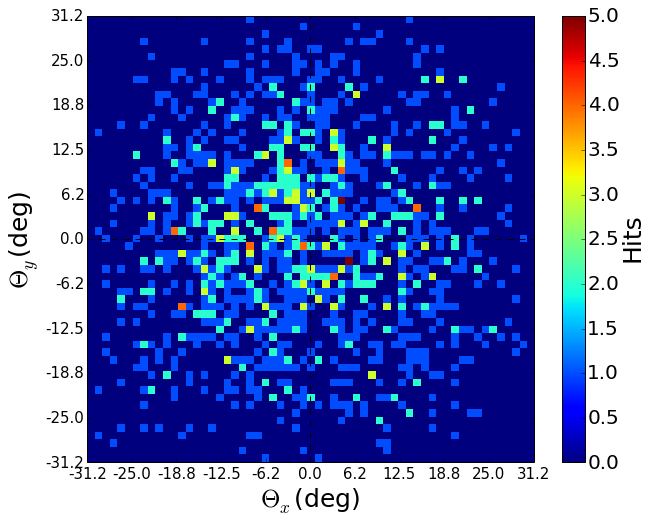

In [32]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(matrix_ang, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)

ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)


#fig.savefig('Fondo.jpg')
#labelsx

print "maximum hits = " + str(np.max(matrix_ang))
print "minimum hits = " + str(np.min(matrix_ang))

## Monthly analysis

In [8]:
file = open("Field_Data/Hodoscope/12_2019/results/match_2019_12.dat", 'w')

panel_file = 0

for j in range(20,28):
    
    day = str(j).zfill(2)
    
    print day
    
    for i in range (24):

        try:
            
            hour = str(i).zfill(2)

            file_Panel_1 = 'Field_Data/Hodoscope/12_2019/clean/MuTe_P1_2019_12_' + day + 'h' + hour + '.dat'
            file_Panel_2 = 'Field_Data/Hodoscope/12_2019/clean/MuTe_P2_2019_12_' + day + 'h' + hour + '.dat'

            #print hour,

            count = 0
            for line in open(file_Panel_1).xreadlines(  ): count += 1

            #print ("Number of lines P1: ") + str(count)

            count = 0
            for line in open(file_Panel_2).xreadlines(  ): count += 1

            #print ("Number of lines P2: ") + str(count)

            # Init time determination


            with open(file_Panel_1) as f:
                i = 0
                panel_file = 1
                for line in f:

                    if line[0] == '#':
                        if line[2] == 's':
                            init_Time1 = int(line[4:15])
                            L1 = i
                            #print "Time P1 : " + str(init_Time1) + " Line : " + str(L1)
                            break
                    i+= 1

            with open(file_Panel_2) as f:
                i = 0
                panel_file = 2
                for line in f:
                    if line[0] == '#':
                        if line[2] == 's':
                            init_Time2 = int(line[4:15])
                            L2 = i
                            #print "Time P2 : " + str(init_Time2) + " Line : " + str(L2)
                            break
                    i += 1

            # Tree data creation

            with open(file_Panel_1) as P1:

                p1_Dic={}
                array = []
                for line in P1:

                    if line[0] != '#':
                        array.append(line)


                    if line[0] == '#':
                        if line[2] == 's':
                            address = line[4:14]
                            p1_Dic[address] = array
                            array = []


            with open(file_Panel_2) as P2:

                p2_Dic={}
                array = []
                for line in P2:

                    if line[0] != '#':
                        array.append(line)

                    if line[0] == '#':
                        if line[2] == 's':
                            address = line[4:14]
                            p2_Dic[address] = array
                            array = []

            # Coincidence file creation

            nevents_P1 = len(p1_Dic)
            nevents_P2 = len(p2_Dic)

            file = open("Field_Data/Hodoscope/12_2019/results/match_2019_12.dat", 'a')

            window = 800000 # 400
            match_counter = 0

            for i in range(3600):
                i+=1
                address_P1 = str(init_Time1 + i)
                address_P2 = str(init_Time1 + i + 1)    # P2 time matching
                if p1_Dic.get(address_P1) != None:
                        if p2_Dic.get(address_P2) != None:
                            #print "Addresses: " + address_P1 + " " + address_P2
                            p1_mat = p1_Dic[address_P1]
                            p2_mat = p2_Dic[address_P2]
                            match(file, address_P1, p1_mat, p2_mat, window)
                            match_counter += 1

            file.close() 

            #print "Seconds matched = " + str(match_counter) + "\n"
            
        except:
            
            print 'Error at hour -> ' + hour + ' Panel ' + str(panel_file)


20
21
22
23
24
25
Error at hour -> 13 Panel 2
26
27
Error at hour -> 10 Panel 2


In [9]:
nBars =  30         # Number of bars per axis
Nd = (2*nBars-1)    # Number of trajectories
C = nBars-1         # Shiffting index

matrix_P1 = np.zeros((nBars,nBars))
matrix_P2 = np.zeros((nBars,nBars))


matrix_ang = np.zeros((Nd,Nd))

sum_columns = np.zeros(nBars)
sum_rows = np.zeros(nBars)

sum_cl1 = 0
sum_cl2 = 0
sum_cl3 = 0

sum_rw1 = 0
sum_rw2 = 0
sum_rw3 = 0

evento = 0

with open('Field_Data/Hodoscope/12_2019/results/match_2019_12.dat') as Hits:
    
    for line in Hits:
        if line[0] != '#' and line[0] != '\t' and line[0] != '\n':
        
            split_line = re.split(r'\t+', line)
            P1 = split_line[4]
            P2 = split_line[5]
            
            try:
                # Panel 1 
            
                columns_P1 = map(int ,(" ".join(P1[0:27] + P1[29:32])).split(' '))
                rows_P1 = map(int ,(" ".join(P1[32:35] + P1[37:64])).split(' '))
    
                # Panel 2 
    
                columns_P2 = map(int ,(" ".join(P2[0:27] + P2[29:32])).split(' '))
                rows_P2 = map(int ,(" ".join(P2[32:35] + P2[37:64])).split(' '))
            
    
                suma_P1_col = np.sum(columns_P1) 
                suma_P1_row =  np.sum(rows_P1)
                suma_P2_col =  np.sum(columns_P2)
                suma_P2_row =  np.sum(rows_P2)
    
                evento = evento + 1
            
            except ValueError as e:
                print "Error at event " + split_line[1] + "\n"
        
            if (suma_P1_col == 1 and suma_P1_row == 1 and suma_P2_col == 1 and suma_P2_row == 1):   # Condición de activación de solo 4 barras
                for i in range(nBars):
                    for j in range(nBars):
            
                        matrix_P1[i,j]= rows_P1[i]*columns_P1[j]
                        matrix_P2[i,j]= rows_P2[i]*columns_P2[j]
        
                if (np.sum(matrix_P1) == 1 and np.sum(matrix_P2) == 1):
    
                    for i in range(nBars):
                        for j in range(nBars):
            
                            if matrix_P1[i,j]== 1:
                                iP1 = i
                                jP1 = j
                            if matrix_P2[i,j]== 1:
                                iP2 = i
                                jP2 = j

                    evento = evento + 1
                    
                    h = iP1 - iP2
                    b = jP1 - jP2
            
                    matrix_ang[h+C,b+C]= matrix_ang[h+C,b+C] + 1
                
            
print 'Número de eventos en ambos paneles = ' + str(evento) + '\n'
print matrix_ang

Número de eventos en ambos paneles = 588417

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [10]:
sep = 250.0
base = 120.0
theta = int(np.rad2deg(np.arctan(base/sep)))/float(nBars)
theta*nBars

25.0

maximum hits = 16.0
minimum hits = 0.0


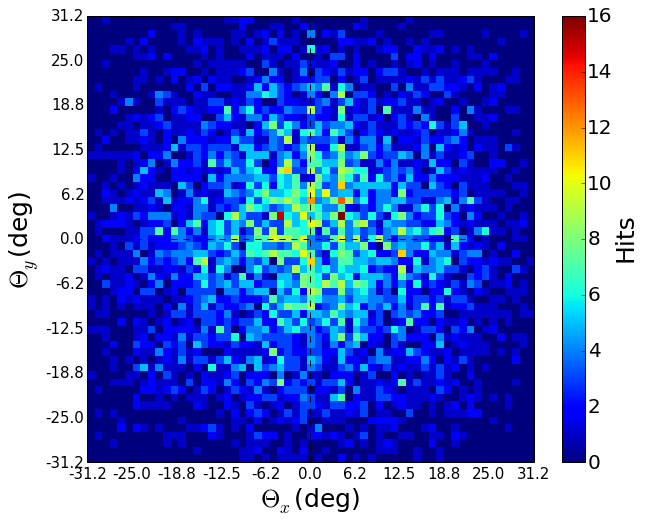

In [12]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(matrix_ang, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)

ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)


#fig.savefig('Fondo.jpg')
#labelsx

print "maximum hits = " + str(np.max(matrix_ang))
print "minimum hits = " + str(np.min(matrix_ang))

### Acceptance  calculation

The number of muons detected by the telescope for a given direction $r_{m,n}$ reads

$$N(r_{m,n}, \Delta T)=I(r_{m,n}) \times \Delta T \times \mathcal{T}(r_{m,n})  $$

where $I$ is the flux of muons given in $cm^{-2}sr^{-1}s^{-1}$, $\Delta T$ is the duration of the measured period, and $\mathcal{T}$ is the telescope acceptance experessed in $cm^2 sr$. The acceptance may be written as,


$$\mathcal{T}(r_{m,n}) = S(r_{m,n}) \times \delta \Omega (r_{m,n})$$

where $S$ is the detection surface and $\delta \Omega$ is the angular aperture.

In [13]:
nBars = 30

Nd = (2*nBars-1)    # Number of trajectories
C = nBars-2         # Shiffting index

acceptance = np.zeros((Nd,Nd))

matrix_P1 = np.zeros((nBars, nBars))
matrix_P2 = np.ones((nBars, nBars))

for i in range(nBars):
    for j in range(nBars):
        matrix_P1[i,j] = 1
        for k in range(nBars):
            for l in range(nBars):

                if matrix_P1[i,j]== 1:
                    iP1 = i
                    jP1 = j
                if matrix_P2[k,l]== 1:
                    iP2 = k
                    jP2 = l

                h = iP1 - iP2
                b = jP1 - jP2

                acceptance[h+C,b+C]= acceptance[h+C,b+C] + 1

In [14]:
d = 4       # 4 Pixel size
A = d**2    #  Pixel area
D = 250.0  # 134 Panel separation
d_Omega =  A/(D**2)
print "Angular resolution = " + str(d_Omega)

theta = int(np.rad2deg(np.arctan(d*nBars/D)))/float(nBars)
acceptance = acceptance*d_Omega*A

Angular resolution = 0.000256


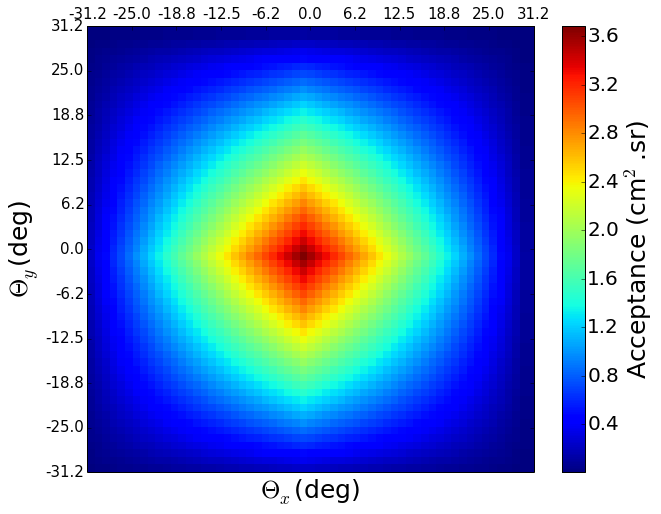

In [15]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(acceptance, interpolation='nearest', extent=extent, origin='lower')

ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Acceptance (cm$^2$.sr)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
#ax.set_xticks(np.arange(Nt))
#ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

Having the number $N$ of muons detected for each direction $r_{m,n}$ during a period $\Delta T$, the integrated flux $I$ reads,

$$I(r_{m,n}) = \frac{N(r_{m,n})}{\Delta T \times \mathcal{T}(r_{m,n})}  (cm^{-2}sr^{-1}s^{-1}) $$

In [22]:
dias = 8
horas = 24
delta_T = dias*horas*3600

Nd = (2*nBars-1)    # Number of trajectories

I_flux = np.zeros((Nd,Nd))

for i in range(Nd):
    for j in range(Nd):
        
        I_flux[i,j] = matrix_ang[i,j]/(delta_T*acceptance[i,j])
        
        if I_flux[i,j] > 0.00012:
            I_flux[i,j] = 0

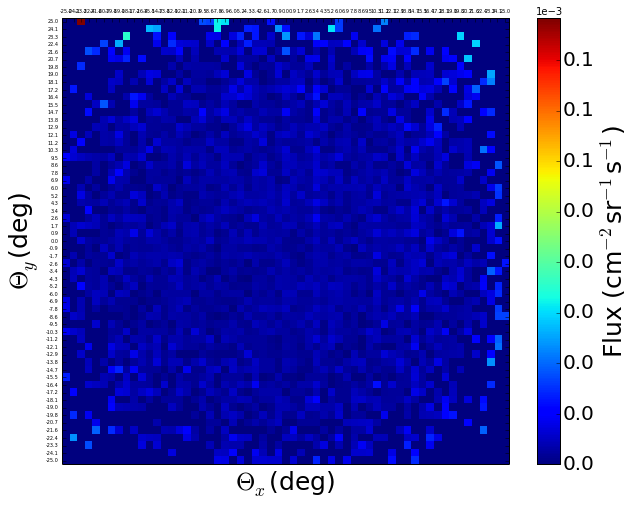

In [23]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

im = plt.imshow(I_flux , interpolation='nearest', origin='low')

ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar(format=OOMFormatter(-3, mathText=False))
clb.set_label('Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels
labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
ax.set_xticks(np.arange(Nt))
ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=5)

#fig.savefig('Fondo.jpg')
#labelsx

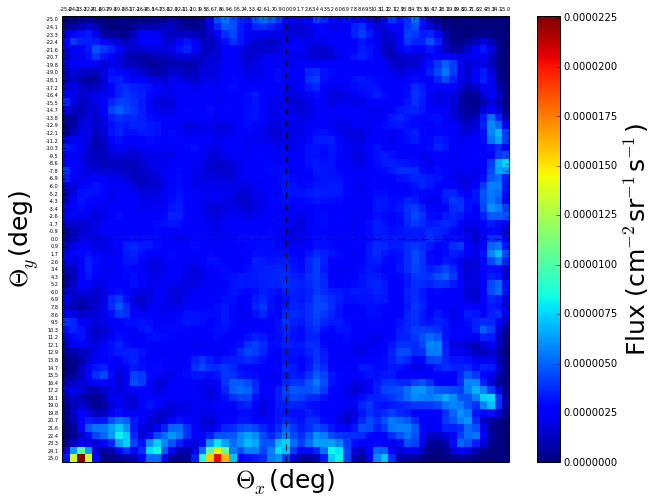

In [24]:
img_flux = ndimage.gaussian_filter(I_flux, sigma=(1), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img_flux, interpolation='nearest')
plt.axvline(x=29, color='k', lw=1, linestyle='--')
plt.axhline(y=29, color='k', lw=1, linestyle='--')
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#ax.invert_yaxis()
ax.xaxis.tick_top()

Nt = Nd
# Set tick label
labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
ax.set_xticks(np.arange(Nt))
ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=5)

# Color bar
clb = plt.colorbar()
clb.set_label('Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)

plt.show()

### Image flip top-down and right-left

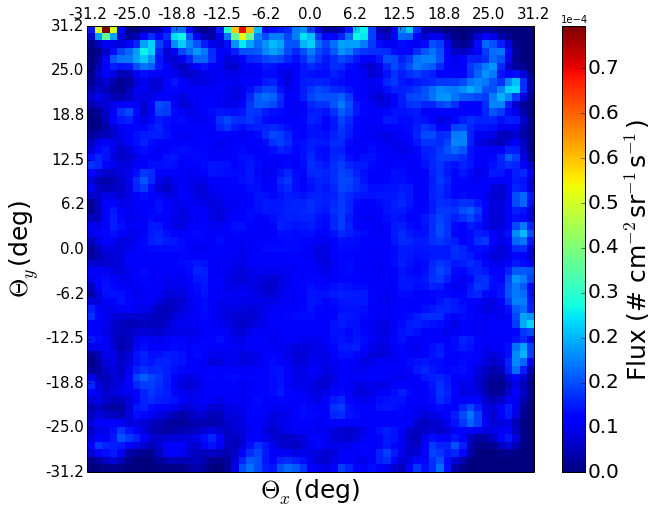

In [26]:
img_flux = ndimage.gaussian_filter(I_flux, sigma=(1), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(img_flux*3.52, interpolation='nearest', extent=extent, origin='lower')

ax.xaxis.tick_top()

# Color bar

clb = plt.colorbar(format=OOMFormatter(-4, mathText=False))
clb.set_label('Flux (# cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
#ax.set_xticks(np.arange(Nt))
#ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

### Open sky flux

In [66]:
open_sky = np.loadtxt("Open_Sky_Flux_Buc.dat")

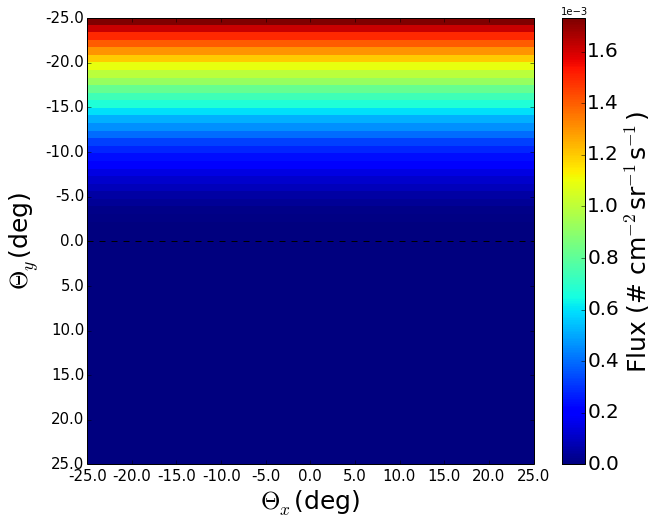

In [76]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(open_sky, interpolation='nearest', extent=extent, origin='lower')
plt.axhline(0, color='k', ls= '--') # horizont

#ax.xaxis.tick_top()
ax.invert_yaxis()

# Color bar

clb = plt.colorbar(format=OOMFormatter(-3, mathText=False))
clb.set_label('Flux (# cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels


labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)

ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

### Flux difference

In [83]:
Diff_flux = np.zeros((Nd,Nd))
R = 3.52

for i in range(Nd):
    for j in range(Nd):
        
        Diff_flux[i,j] = open_sky[i,j] - R*img_flux[i,j]
        

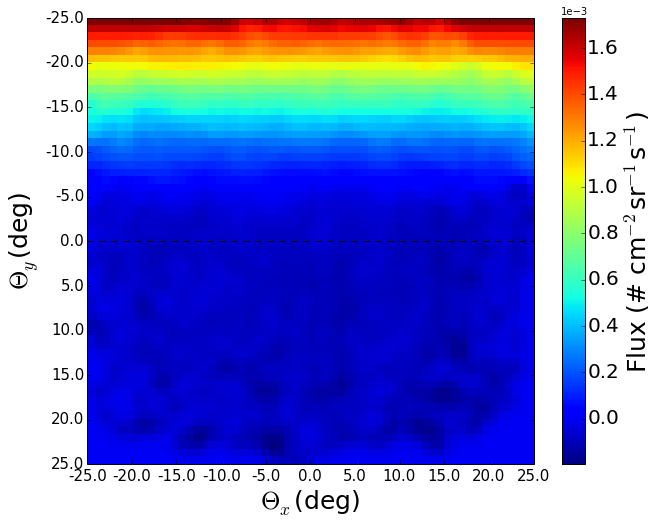

In [84]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(Diff_flux, interpolation='nearest', extent=extent, origin='lower')
plt.axhline(0, color='k', ls= '--') # horizont

#ax.xaxis.tick_top()
ax.invert_yaxis()

# Color bar

clb = plt.colorbar(format=OOMFormatter(-3, mathText=False))
clb.set_label('Flux (# cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)

ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

### Rate analysis

In [2]:
Temp_P1 = np.loadtxt('Field_Data/Hodoscope/12_2019/Temp_P1.dat')
Temp_P2 = np.loadtxt('Field_Data/Hodoscope/12_2019/Temp_P2.dat')

In [3]:
Rate_P1 = np.loadtxt('Field_Data/Hodoscope/12_2019/Rate_P1.dat')
Rate_P2 = np.loadtxt('Field_Data/Hodoscope/12_2019/Rate_P2.dat')

In [4]:
dates = [dt.datetime.fromtimestamp(ts) for ts in  Rate_P1[:,0]]
date_P1 = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  Rate_P2[:,0]]
date_P2 = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  Temp_P1[:,0]]
date_T1 = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  Temp_P2[:,0]]
date_T2 = md.date2num(dates)

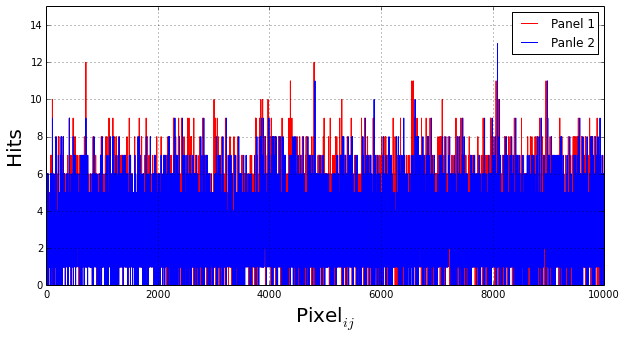

In [26]:
fig = plt.figure(figsize=(10, 5))
plt.plot(Rate_P1[0:10000,1], 'r')
plt.plot(Rate_P2[0:10000,1], 'b')
plt.xlabel("Pixel$_{ij}$", fontsize = 20)
plt.ylabel("Hits", fontsize = 20)
plt.legend(["Panel 1", "Panle 2"], loc=1)
plt.axis([0,10000, 0, 15])
plt.grid()
plt.show()

In [5]:
def smooth (data,win):
    
    N = len(data)
    step = (win-1)/2
    out = np.zeros(N)
    
    for j in range(step,N-step):
        valor = 0
        for k in range (-step,step + 1):
            valor = valor + data[j+k]

        out [j] = valor/win
    return out

In [6]:
Rate_P1s = smooth(Rate_P1[:,1],150)

In [7]:
Rate_P2s = smooth(Rate_P2[:,1],150)

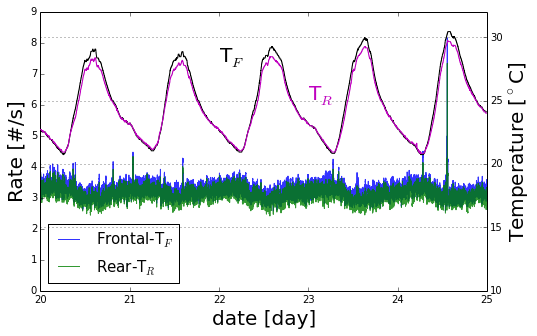

In [8]:
fig, ax1= plt.subplots(figsize=(8, 5))
ax1.plot(date_P1, Rate_P1s, 'b', alpha=0.8)
ax1.plot(date_P2, Rate_P2s, 'g', alpha=0.8)
ax1.set_ylabel("Rate [#/s]", fontsize = 20)
plt.legend(["Frontal-T$_F$", "Rear-T$_R$"], fontsize =15, loc=3)
ax1.set_ylim([0,9])

ax2 = ax1.twinx()

ax2.plot(date_T1, Temp_P1[:,1], 'k')
ax2.plot(date_T2, Temp_P2[:,1], 'm')

ax=plt.gca()
xfmt = md.DateFormatter('%d')
ax.xaxis.set_major_formatter(xfmt)
ax1.set_xlabel("date [day]", fontsize = 20)
ax2.set_ylabel("Temperature [$^{\circ}$C]", fontsize = 20)
ax2.set_xlim([dt.date(2019, 12, 20),dt.date(2019, 12, 25)])
ax2.set_ylim([10,32])

ax2.text(dt.date(2019, 12, 23), 25, "T$_R$", color='m', fontsize = 20)
ax2.text(dt.date(2019, 12, 22), 28, "T$_F$", color='k', fontsize = 20)

plt.grid()
plt.show()

fig.savefig('Modulation.eps')

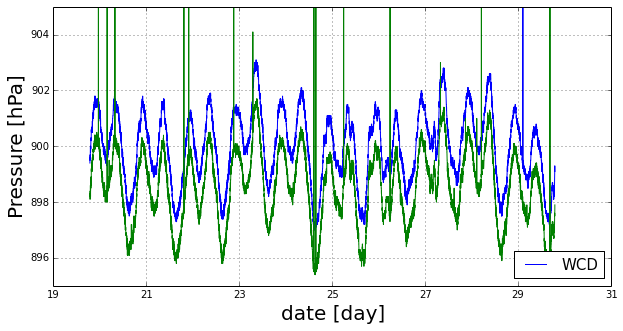

In [155]:
fig = plt.figure(figsize=(10, 5))
plt.plot(date_T1, Temp_P1[:,2], 'b')
plt.plot(date_T2, Temp_P2[:,2], 'g')
#plt.axhline(y=2, color='k', linestyle='--')
ax=plt.gca()
xfmt = md.DateFormatter('%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xlabel("date [day]", fontsize = 20)
plt.ylabel("Pressure [hPa]", fontsize = 20)
plt.legend(["WCD"], fontsize =15, loc=4)
ax.set_ylim([895,905])
plt.grid()